# Лабораторная работа №6. Решение моделей в непрерывном и дискретном времени


## Повторение примеров

### 6.2.1. Решение обыкновенных дифференциальных уравнений

Напомним, что обыкновенное дифференциальное уравнение (ОДУ) описывает изменение некоторой переменной $u$:
$$
𝑢(𝑡) = 𝑓(𝑢(𝑡), 𝑝, 𝑡),
$$
где $𝑓(𝑢(𝑡), 𝑝, 𝑡)$ — нелинейная модель (функция) изменения $𝑢(𝑡)$ с заданным начальным значением $𝑢(𝑡_0) = 𝑢_0$, $𝑝$ — параметры модели, $𝑡$ — время.

Для решения обыкновенных дифференциальных уравнений (ОДУ) в Julia можно использовать пакет `diffrentialEquations.jl`

#### 6.2.1.1. Модель экспоненциального роста

Рассмотрим пример использования этого пакета для решение уравнения модели экспоненциального роста, описываемую уравнением
$$
𝑢′(𝑡) = 𝑎𝑢(𝑡), \quad 𝑢(0) = 𝑢_0.
$$
где $𝑎$ — коэффициент роста.
Предположим, что заданы следующие начальные данные $𝑎 = 0.98$, $𝑢(0) = 1.0$, $𝑡 \in [0; 1.0]$.

Аналитическое решение модели имеет вид:
$$
𝑢(𝑡) = 𝑢_0e^{𝑎𝑡}𝑢(𝑡).
$$

Численное решение в Julia будет иметь следующий вид:

In [1]:
# подключаем необходимые пакеты:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `C:\Users\User\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [2]:
using DifferentialEquations

[ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
┌ Warning: Replacing docs for `SciMLBase.sol :: Union{Tuple, Tuple{D}, Tuple{S}, Tuple{N}, Tuple{T}} where {T, N, S, D}` in module `SciMLBase`
└ @ Base.Docs docs\Docs.jl:240


In [3]:
# задаём описание модели с начальными условиями:
a = 0.98
f(u,p,t) = a*u
u0 = 1.0
# задаём интервал времени:
tspan = (0.0,1.0)

(0.0, 1.0)

In [4]:
# решение:
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

Построение графика, соответствующего полученному решению:

In [5]:
# подключаем необходимые пакеты:
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


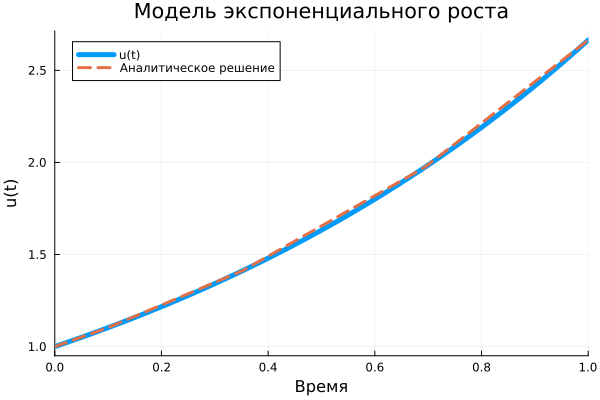

In [6]:
# строим графики:
plot(sol, linewidth=5,title="Модель экспоненциального роста",
    xaxis="Время",yaxis="u(t)",label="u(t)")
plot!(sol.t, t->1.0*exp(a*t),
    lw=3,ls=:dash,label="Аналитическое решение")

При построении одного из графиков использовался вызов sol.t, чтобы захватить
массив моментов времени. Массив решений можно получить, воспользовавшись sol.u.

Если требуется задать точность решения, то можно воспользоваться параметрами
abstol (задаёт близость к нулю) и reltol (задаёт относительную точность). По умолчанию эти параметры имеют значение abstol = 1e-6 и reltol = 1e-3.

Для модели экспоненциального роста

In [7]:
# задаём точность решения:
sol = solve(prob,abstol=1e-8,reltol=1e-8)
println(sol)

ODESolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Float64}}, ODEProblem{Float64, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, CompositeAlgorithm{Tuple{Vern7{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rodas4{0, false, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing}}, OrdinaryDiffEq.AutoSwitchCache{Vern7{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rodas4{0, false, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing}, R

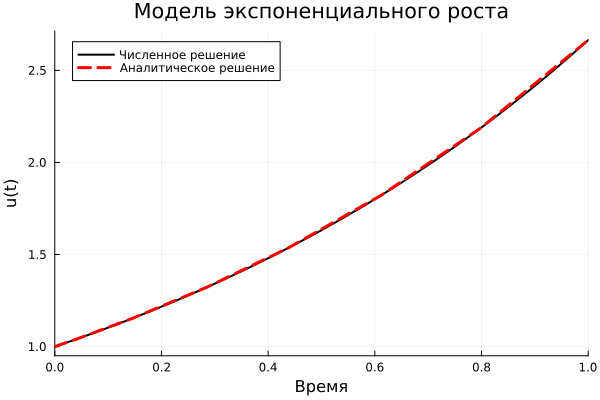

In [8]:
# строим график:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста",
    xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t,
    t->1.0*exp(a*t),lw=3,ls=:dash,
    color="red",label="Аналитическое решение")

#### 6.2.1.2. Система Лоренца

Динамической системой Лоренца является нелинейная автономная система обыкновенных дифференциальных уравнений третьего порядка:
$$
\begin{cases}
\dot{x} = \sigma(y - x), \\
\dot{y} = \rho x - y - xz, \\
̇\dot{z} = xy - \beta z,
\end{cases}
$$
где $\sigma$, $\rho$ и $\beta$ — параметры системы (некоторые положительные числа, обычно указывают $\sigma = 10$, $\rho = 28$ и $\beta = \frac{8}{3}$).

Система получена из системы уравнений Навье–Стокса и описывает движение воздушных потоков в плоском слое жидкости постоянной толщины при разложении
скорости течения и температуры в двойные ряды Фурье с последующем усечением до первых-вторых гармоник.

Решение системы неустойчиво на аттракторе, что не позволяет применять классические численные методы на больших отрезках времени, требуется использовать
высокоточные вычисления.

Численное решение в Julia будет иметь следующий вид:

In [9]:
# задаём описание модели:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

lorenz! (generic function with 1 method)

In [11]:
# задаём начальное условие:
u0 = [1.0,0.0,0.0]
# задаём знанчения параметров:
p = (10,28,8/3)
# задаём интервал времени:
tspan = (0.0,100.0);

In [12]:
# решение:
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1263-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072
   0.01695646895607931
   0.02768995855685593
   0.04185635042021763
   0.06024041165841079
   0.08368541255159562
   0.11336499649094857
   0.1486218182609657
   0.18703978481550704
   ⋮
  99.05535949898116
  99.14118781914485
  99.22588252940076
  99.30760258626904
  99.39665422328268
  99.49536147459878
  99.58822928767293
  99.68983993598462
  99.77864535713971
  99.85744078539504
  99.93773320913628
 100.0
u: 1263-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.001046162

Фазовый портрет:

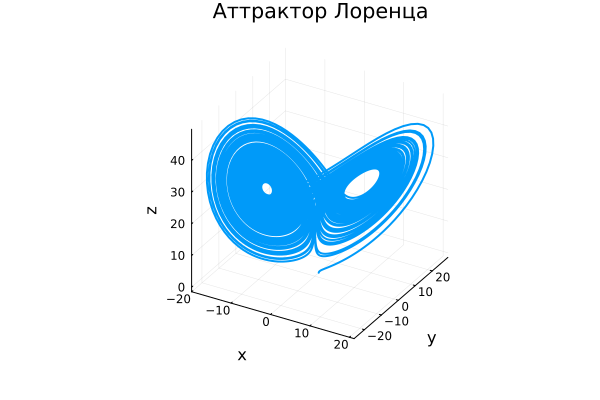

In [14]:
# строим график:
plot(sol, idxs=(1,2,3), lw=2, title="Аттрактор Лоренца",
    xaxis="x",yaxis="y", zaxis="z",legend=false)

Можно отключить интерполяцию:

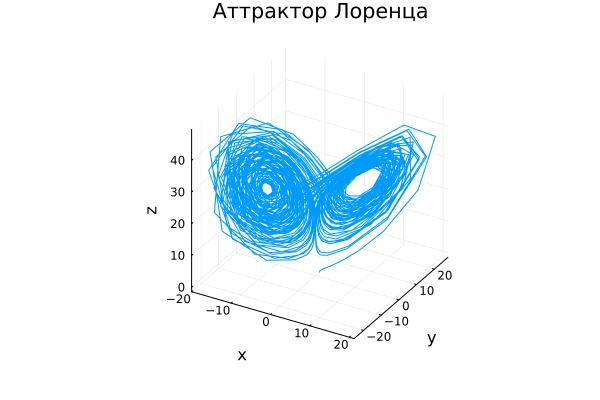

In [15]:
# отключаем интерполяцию:
plot(sol,vars=(1,2,3),denseplot=false, lw=1, title="Аттрактор Лоренца",
    xaxis="x",yaxis="y", zaxis="z",legend=false)

### 6.2.2. Модель Лотки–Вольтерры

Модель Лотки–Вольтерры описывает взаимодействие двух видов типа «хищник – жертва»:
$$
\begin{cases}
\dot{x} = (\alpha − \beta y)x, \\
\dot{y} = (-\gamma + \delta x)y,
\end{cases}
$$
где $x$ — количество жертв, $y$ — количество хищников, $t$ — время, $\alpha$, $\beta$, $\gamma$, $\delta$ — коэффициенты, отражающие взаимодействия между видами (в данном случае $\alpha$ — коэффициент
рождаемости жертв, $\gamma$ — коэффициент убыли хищников, $\beta$ — коэффициент убыли жертв в результате взаимодействия с хищниками, $\delta$ — коэффициент роста численности хищников).

Численное решение в Julia будет иметь следующий вид:

In [17]:
# подключаем необходимые пакеты:
import Pkg
Pkg.add("ParameterizedFunctions")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [19]:
using ParameterizedFunctions

In [20]:
# задаём описание модели:
lv! = @ode_def LotkaVolterra begin
dx = a*x - b*x*y
dy = -c*y + d*x*y
end a b c d

(::LotkaVolterra{var"###ParameterizedDiffEqFunction#718", var"###ParameterizedTGradFunction#719", var"###ParameterizedJacobianFunction#720", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [23]:
# задаём начальное условие:
u0 = [1.0,1.0]
# задаём знанчения параметров:
p = (1.5,1.0,3.0,1.0)
# задаём интервал времени:
tspan = (0.0,10.0);

In [24]:
# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 34-element Vector{Float64}:
  0.0
  0.0776084743154256
  0.23264513699277584
  0.4291185174543143
  0.6790821987497083
  0.9444046158046306
  1.2674601546021105
  1.6192913303893046
  1.9869754428624007
  2.2640902393538296
  2.5125484290863063
  2.7468280298123062
  3.0380065851974147
  ⋮
  6.455762090996754
  6.780496138817711
  7.171040059920871
  7.584863345264154
  7.978068981329682
  8.48316543760351
  8.719248247740158
  8.949206788834692
  9.200185054623292
  9.438029017301554
  9.711808134779586
 10.0
u: 34-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0454942346944578, 0.8576684823217127]
 [1.1758715885138267, 0.639459570317544]
 [1.4196809607170826, 0.4569962601282084]
 [1.876719395008001, 0.32473342927911314]
 [2.5882500645533466, 0.26336255535952163]
 [3.8607089092207665, 0.2794458098285253]
 [5.750812667710396, 0.5220072537934558]
 [

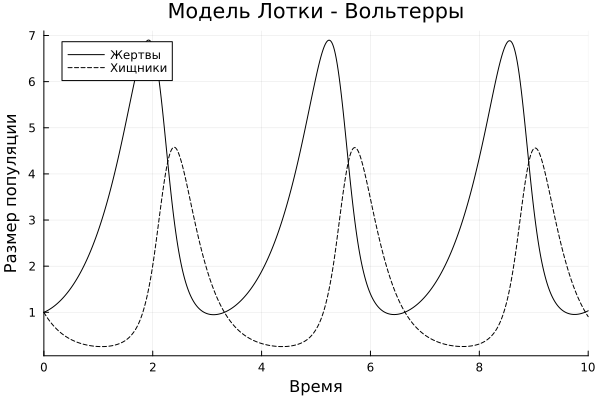

In [26]:
plot(sol, label = ["Жертвы" "Хищники"], color="black", ls=[:solid :dash], title="Модель Лотки - Вольтерры",
    xaxis="Время",yaxis="Размер популяции")

Фазовый портрет:

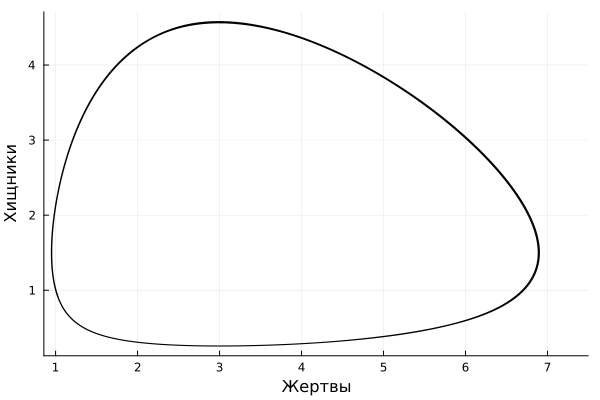

In [28]:
# фазовый портрет:
plot(sol, idxs=(1,2), color="black", xaxis="Жертвы",yaxis="Хищники", legend=false)

## Самостоятельное задание

In [42]:
using LaTeXStrings

### 1. Реализовать и проанализировать модель роста численности изолированной популяции (модель Мальтуса):

̇$$\dot{x} = ax, \quad a = b - c,$$
где $𝑥(𝑡)$ — численность изолированной популяции в момент времени $𝑡$, $𝑎$ — коэффициент роста популяции, $𝑏$ — коэффициент рождаемости, $𝑐$ — коэффициент смертности.
Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией).

In [32]:
# задаём описание модели с начальными условиями:
b = 4.2 # чуть больше 4 детей на семью
c = 2.1 # двое умирают
a = b - c
Maltus(u,p,t) = a*u
u0_1 = 1.0;

In [39]:
# задаём интервал времени:
tspan_1 = (0.0,1.0)

(0.0, 1.0)

In [71]:
# решение:
prob_1 = ODEProblem(Maltus,u0_1,tspan_1)
sol_1 = solve(prob_1, abstol=1e-16, reltol=1e-16)

retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 63-element Vector{Float64}:
 0.0
 0.00915890363384417
 0.016579777630371828
 0.023921681410520583
 0.031394474505082974
 0.04002297337896621
 0.048059121461500494
 0.056642844965357
 0.06483751194505144
 0.07459464203321045
 0.08277236411239146
 0.09214225439582731
 0.10178079670017122
 ⋮
 0.7830430925256849
 0.8044017477419722
 0.8257702262777016
 0.8466694115956777
 0.8688960913954831
 0.8890305790641818
 0.9099448451019394
 0.9290961810244789
 0.9477639708777722
 0.9710765229336767
 0.9900513828337181
 1.0
u: 63-element Vector{Float64}:
 1.0
 1.0194198567875812
 1.0354307596418606
 1.0515187324306086
 1.0681502310906115
 1.08768136674715
 1.1061927394698512
 1.1263135723974413
 1.1458638137762651
 1.1695847230844163
 1.1898437127037809
 1.2134878505555127
 1.238300249927902
 ⋮
 5.177853014068694
 5.415383340363222
 5.663927041306394
 5.9180426711406

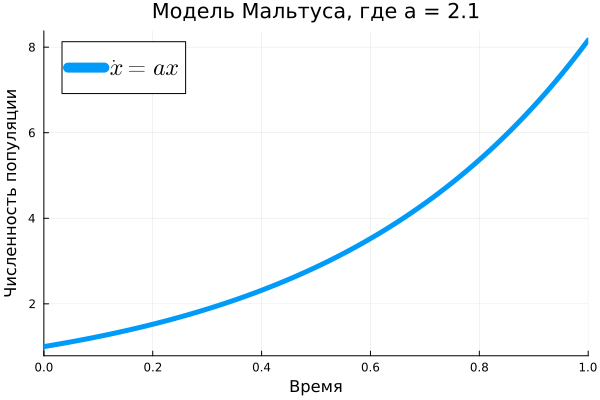

In [101]:
# строим графики:
plot(sol_1, linewidth=5,title="Модель Мальтуса, где a = $a",
    xaxis="Время",yaxis="Численность популяции",label=L"$\dot{x} = ax$", legendfontsize=16)

[ Info: Saved animation to C:\Users\User\Documents\work\study\2023-2024\Statistical_Analysis_computer-practise\computer-practice\labs\lab06\report\report\tmp.gif


Plots.AnimatedGif("C:\\Users\\User\\Documents\\work\\study\\2023-2024\\Statistical_Analysis_computer-practise\\computer-practice\\labs\\lab06\\report\\report\\tmp.gif")
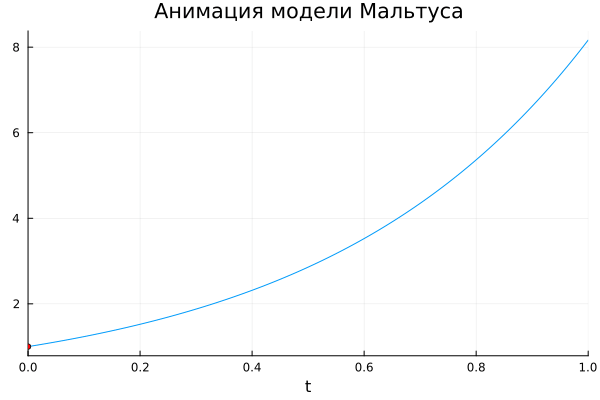

In [84]:
plot(sol_1, idxs=(0, 1), label = L"$u(t)$", 
        title = "Анимация модели Мальтуса")
@gif for i ∈ 1:length(sol_1.u) 
    scatter!((sol_1.t[i], sol_1.u[i]),
        ms = 3,
        color =:red,
        legend=false)
end 

### 2. Реализовать и проанализировать логистическую модель роста популяции, заданную уравнением:
$$
\dot{x} = rx (1 - \frac{x}{k}), \quad r > 0, k > 0,
$$
$𝑟$ — коэффициент роста популяции, $𝑘$ — потенциальная ёмкость экологической системы (предельное значение численности популяции). Начальные данные и параметры
задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в
том числе с анимацией).

In [86]:
# задаём описание модели с начальными условиями:
r = 2.1  # Популяция растет
k = 100 # Ограничение популяции
Logistic(u,p,t) = r*u*(1 - u/k)
u0_2 = 1.0; # Начальная популяция

In [87]:
# задаём интервал времени:
tspan_2 = (0.0,5.0);

In [89]:
# решение:
prob_2 = ODEProblem(Logistic,u0_2,tspan_2)
sol_2 = solve(prob_2, abstol=1e-12, reltol=1e-12)

retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 47-element Vector{Float64}:
 0.0
 0.02557129468588408
 0.07027392683941402
 0.1292981705139264
 0.19099650718606195
 0.2593943135157928
 0.33103713793150485
 0.4068732224998999
 0.4854476682373941
 0.5669163250279707
 0.6505911928998332
 0.7365118890180666
 0.824537484002157
 ⋮
 3.481841649322189
 3.607413263333669
 3.737945568410705
 3.867103902707648
 3.999410228846137
 4.133649617117162
 4.27144608385097
 4.412968938376174
 4.559102753690844
 4.710386048062807
 4.867700635619142
 5.0
u: 47-element Vector{Float64}:
  1.0
  1.0545859167209892
  1.1571803397367753
  1.307885043836402
  1.486122298793529
  1.7117440394183117
  1.9841436385614546
  2.3187393463318813
  2.723393695909831
  3.215215015929423
  3.809332571623973
  4.528465981664943
  5.398301140761318
  ⋮
 93.80076790254658
 95.16829757362294
 96.28368336650614
 97.14129639552722
 97.819653

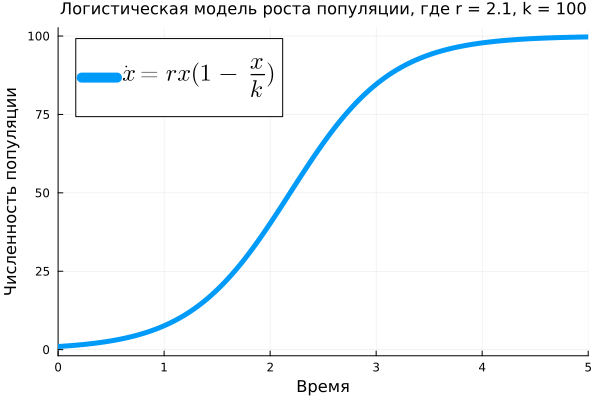

In [103]:
# строим график:
plot(sol_2, linewidth=5,title="Логистическая модель роста популяции, где r = $r, k = $k", titlefontsize = 11,
    xaxis="Время",yaxis="Численность популяции",label=L"$\dot{x} = rx(1 - \frac{x}{k})$", legendfontsize=16)

[ Info: Saved animation to C:\Users\User\Documents\work\study\2023-2024\Statistical_Analysis_computer-practise\computer-practice\labs\lab06\report\report\tmp.gif


Plots.AnimatedGif("C:\\Users\\User\\Documents\\work\\study\\2023-2024\\Statistical_Analysis_computer-practise\\computer-practice\\labs\\lab06\\report\\report\\tmp.gif")
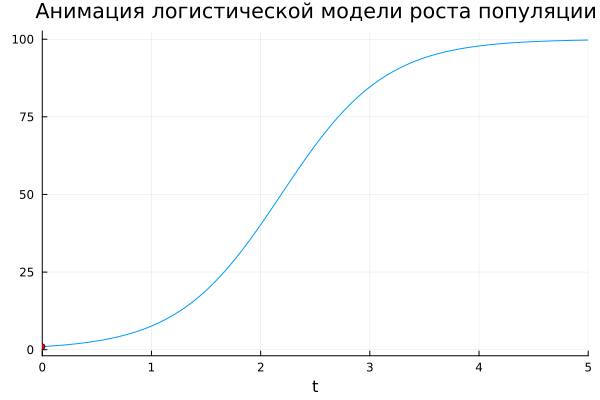

In [92]:
plot(sol_2, idxs=(0, 1), label = L"$u(t)$", 
        title = "Анимация логистической модели роста популяции")
@gif for i ∈ 1:length(sol_2.u) 
    scatter!((sol_2.t[i], sol_2.u[i]),
        ms = 3,
        color =:red,
        legend=false)
end 

### 3. Реализовать и проанализировать модель эпидемии Кермака–Маккендрика (SIR-модель):
$$
\begin{cases}
\dot{s} = -\beta \iota s, \\
\dot{\iota} = \beta \iota s - \nu \iota, \\
\dot{r} = \nu \iota,
\end{cases}
$$
где $𝑠(𝑡)$ — численность восприимчивых к болезни индивидов в момент времени $𝑡$, $\iota(𝑡)$ — численность инфицированных индивидов в момент времени $𝑡$, $𝑟(𝑡)$ —
численность переболевших индивидов в момент времени $𝑡$, $\beta$ — коэффициент интенсивности контактов индивидов с последующим инфицированием, $\nu$ — коэффициент
интенсивности выздоровления инфицированных индивидов. Численность популяции
считается постоянной, т.е. $\dot{s} + \dot{\iota} + \dot{r} = 0$. Начальные данные и параметры задать
самостоятельно и пояснить их выбор. Построить соответствующие графики (в том
числе с анимацией).

In [104]:
# задаём описание модели:
function SIR!(du,u,p,t)
    β, ν = p
    du[1] = -β*u[1]*u[2]
    du[2] = β*u[1]*u[2] - ν*u[2]
    du[3] = ν*u[2]
end

SIR! (generic function with 1 method)

In [148]:
# задаём начальное условие:
u0_3 = [1000.0, 1.0, 0.0]
# задаём значения параметров (β, ν):
p_3 = (0.02, 2)
# задаём интервал времени:
tspan_3 = (0.0,1.5);

In [158]:
# решение:
prob_3 = ODEProblem(SIR!,u0_3,tspan_3,p_3)
sol_3 = solve(prob_3, abstol=1e-8, reltol=1e-8)

retcode: Success
Interpolation: specialized 7th order lazy interpolation, specialized 3rd order "free" stiffness-aware interpolation
t: 63-element Vector{Float64}:
 0.0
 0.019428660504419996
 0.03103030076140588
 0.046548992414566434
 0.06036452698837914
 0.07528982785392146
 0.08987302010494794
 0.10479621908168664
 0.11969815632827989
 0.13475915642728148
 0.14991706841831004
 0.16526698934205905
 0.18088183839045802
 ⋮
 0.9561587778815379
 0.9877355126548749
 1.0213013154709596
 1.057170834264557
 1.0957302548429728
 1.1374700813772423
 1.1830320363924256
 1.233299967722454
 1.2896015810740609
 1.3543106317923201
 1.4347985931997127
 1.5
u: 63-element Vector{Vector{Float64}}:
 [1000.0, 1.0, 0.0]
 [999.5349394257488, 1.4185436994052925, 0.0465168748459432]
 [999.1691628881451, 1.747718867024899, 0.08311824482999013]
 [998.5441982627083, 2.3101154926697234, 0.1456862446219985]
 [997.8210047226144, 2.9608580031977985, 0.21813727418783002]
 [996.8101774356394, 3.870330475052082, 0.31949

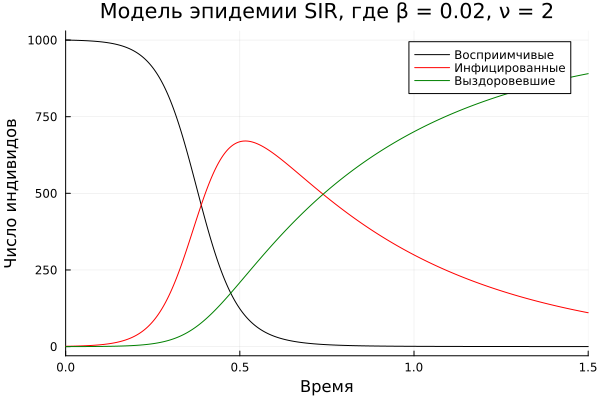

In [159]:
plot(sol_3, label = ["Восприимчивые" "Инфицированные" "Выздоровевшие"], color=["black" "red" "green"], ls=:solid, title="Модель эпидемии SIR, где β = $(p_3[1]), ν = $(p_3[2])",
    xaxis="Время",yaxis="Число индивидов")

[ Info: Saved animation to C:\Users\User\Documents\work\study\2023-2024\Statistical_Analysis_computer-practise\computer-practice\labs\lab06\report\report\tmp.gif


Plots.AnimatedGif("C:\\Users\\User\\Documents\\work\\study\\2023-2024\\Statistical_Analysis_computer-practise\\computer-practice\\labs\\lab06\\report\\report\\tmp.gif")
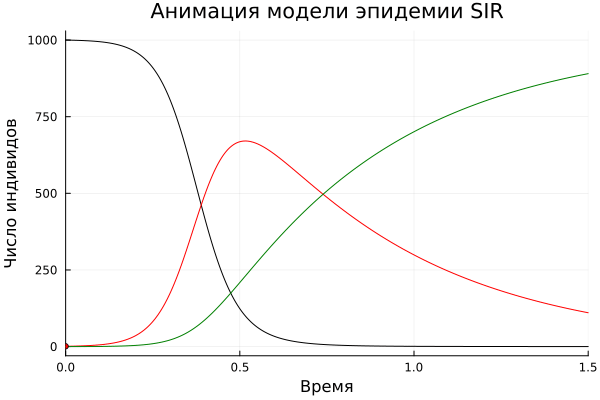

In [160]:
plot(sol_3, label = ["Восприимчивые" "Инфицированные" "Выздоровевшие"], color=["black" "red" "green"], ls=:solid, title="Анимация модели эпидемии SIR",
    xaxis="Время",yaxis="Число индивидов")
@gif for i ∈ 1:length(sol_3.u) 
    scatter!((sol_3.t[i], sol_3.u[i][2]),
        ms = 3,
        color =:red,
        legend=false)
end

### 4. Как расширение модели SIR (Susceptible-Infected-Removed) по результатом эпидемии испанки была предложена модель SEIR (Susceptible-Exposed-Infected-Removed):
$$
\begin{cases}
\dot{s}(t) = -\frac{\beta}{N} s(t)\iota(t), \\
\dot{e}(t) = \frac{\beta}{N} s(t)\iota(t) - \delta e(t), \\
\dot{\iota}(t) = \delta e(t) - \gamma \iota(t), \\
\dot{r}(t) = \gamma \iota(t).
\end{cases}
$$
Размер популяции сохраняется:
$$s(t) + e(t) + \iota(t) + r(t) = N.$$
Исследуйте, сравните с SIR.

In [161]:
# задаём описание модели:
SEIR! = @ode_def SEIR begin
ds = -β/N*s*i
de = β/N*s*i - δ*e
di = δ*e - γ*i
dr = γ*i
end N β δ γ

(::SEIR{var"###ParameterizedDiffEqFunction#4940", var"###ParameterizedTGradFunction#4941", var"###ParameterizedJacobianFunction#4942", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [205]:
# задаём начальное условие:
u0_4 = [1000.0, 10.0, 1.0, 0.0]
# задаём значения параметров (N β δ γ):
p_4 = (1111, 6.0, 2.0, 1.0)
# задаём интервал времени:
tspan_4 = (0.0, 8.0);

In [206]:
# решение:
prob_4 = ODEProblem(SEIR!,u0_4,tspan_4,p_4)
sol_4 = solve(prob_4, abstol=1e-12, reltol=1e-12)

retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 102-element Vector{Float64}:
 0.0
 0.020382163204281788
 0.04668077162216282
 0.07464937140656683
 0.10623781272295595
 0.14002458787228755
 0.1766217282661112
 0.21552779808438238
 0.256841257526532
 0.30042290113756115
 0.3462978763041009
 0.39443426105910573
 0.4449320040234373
 ⋮
 6.660747149822965
 6.77463567452797
 6.889829290478822
 7.006363795802013
 7.124391656821628
 7.244012953805387
 7.365342527138759
 7.48853015352197
 7.613719040182397
 7.741043991632618
 7.870705989068766
 8.0
u: 102-element Vector{Vector{Float64}}:
 [1000.0, 10.0, 1.0, 0.0]
 [999.868975522941, 9.729081760633262, 1.3776797612017566, 0.02426295522398142]
 [999.6402576235291, 9.453670539776526, 1.839447555477261, 0.06662428121713568]
 [999.3271824125596, 9.244174215600447, 2.3040180521425335, 0.1246253196974137]
 [998.8916633979782, 9.100700907000231, 2.8022948864816613, 0

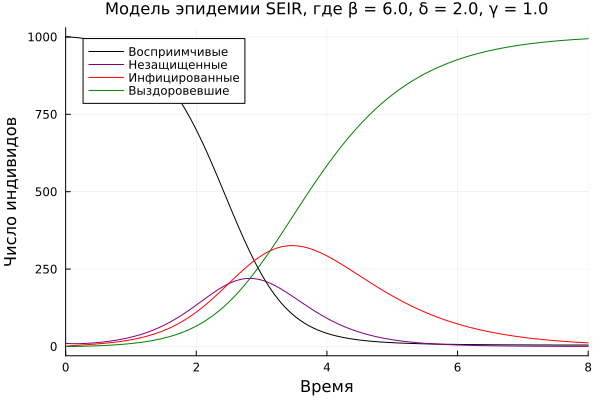

In [207]:
plot(sol_4, label = ["Восприимчивые" "Незащищенные" "Инфицированные" "Выздоровевшие"], color=["black" "purple" "red" "green"], ls=:solid, 
    title="Модель эпидемии SEIR, где β = $(p_4[2]), δ = $(p_4[3]), γ = $(p_4[4])", titlefontsize=11,
    xaxis="Время",yaxis="Число индивидов")

[ Info: Saved animation to C:\Users\User\Documents\work\study\2023-2024\Statistical_Analysis_computer-practise\computer-practice\labs\lab06\report\report\tmp.gif


Plots.AnimatedGif("C:\\Users\\User\\Documents\\work\\study\\2023-2024\\Statistical_Analysis_computer-practise\\computer-practice\\labs\\lab06\\report\\report\\tmp.gif")
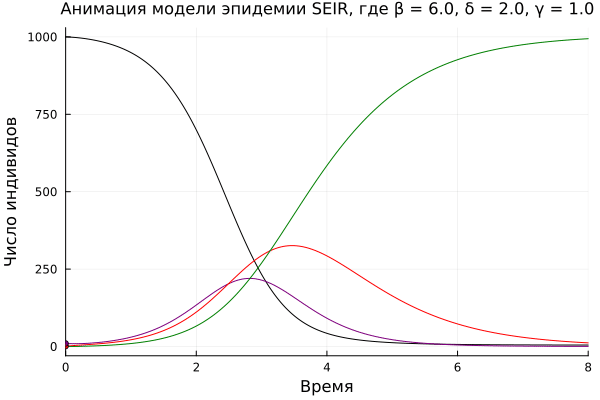

In [209]:
plot(sol_4, label = ["Восприимчивые" "Незащищенные" "Инфицированные" "Выздоровевшие"], color=["black" "purple" "red" "green"], ls=:solid, 
    title="Анимация модели эпидемии SEIR, где β = $(p_4[2]), δ = $(p_4[3]), γ = $(p_4[4])", titlefontsize=11,
    xaxis="Время",yaxis="Число индивидов")
@gif for i ∈ 1:length(sol_4.u) 
    scatter!((sol_4.t[i], sol_4.u[i][3]),
        ms = 3,
        color =:red,
        legend=false)
    scatter!((sol_4.t[i], sol_4.u[i][2]),
        ms = 3,
        color =:purple,
        legend=false)
end

### 5. Для дискретной модели Лотки–Вольтерры:
$$
\begin{cases}
X_1(t + 1) = aX_1(t)(1 - X_1(t)) - X_1(t)X_2(t), \\
X_2(t + 1) = -cX_2(t) + dX_1(t)X_2(t).
\end{cases}
$$
с начальными данными $𝑎 = 2$, $𝑐 = 1$, $𝑑 = 5$ найдите точку равновесия. Получите
и сравните аналитическое и численное решения. Численное решение изобразите на
фазовом портрете.

In [210]:
# задаём описание модели:
Discrete_lv! = @ode_def DiscreteLotkaVolterra begin
dx = a*x*(1 - x) - x*y
dy = -c*y + d*x*y
end a c d

(::DiscreteLotkaVolterra{var"###ParameterizedDiffEqFunction#6422", var"###ParameterizedTGradFunction#6423", var"###ParameterizedJacobianFunction#6424", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [211]:
# задаём начальное условие:
u0_5 = [1.0,1.0]
# задаём значения параметров (a, c, d):
p_5 = (2, 1, 5)
# задаём интервал времени:
tspan_5 = (0.0,100.0);

In [212]:
# решение:
prob_5 = ODEProblem(Discrete_lv!, u0_5, tspan_5, p_5)
sol_5 = solve(prob_5, abstol=1e-12, reltol=1e-12)

retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 293-element Vector{Float64}:
   0.0
   0.023933673062369404
   0.056549426341570126
   0.0918546039316109
   0.13157913167634175
   0.17623998604311483
   0.2256889594785779
   0.2723828322821779
   0.32165420771033587
   0.37122971905692975
   0.42278215285380416
   0.4764297496513247
   0.5347420142156215
   ⋮
  89.0731860409692
  89.96511604393481
  90.93042976050276
  91.91706073863338
  92.86472583729973
  93.91152283948671
  94.89784659478913
  95.93873953516206
  97.03622910204601
  98.06762574737543
  99.24469633467092
 100.0
u: 293-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [0.9757714161865111, 1.0988794266806567]
 [0.9417514627049559, 1.2436430769136675]
 [0.9035550129208922, 1.4128843796902384]
 [0.8588695418863462, 1.6176375910710448]
 [0.8066309921585056, 1.8632072388536296]
 [0.7467904620186603, 2.1488319825950906]
 [0.6890708878732563

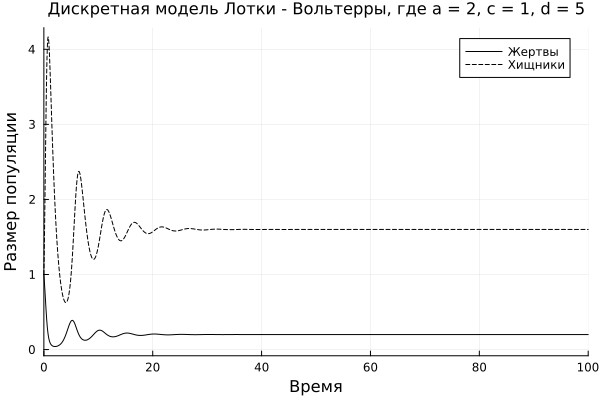

In [228]:
# строим график:
plot(sol_5, label = ["Жертвы" "Хищники"], color="black", ls=[:solid :dash], 
    title="Дискретная модель Лотки - Вольтерры, где a = $(p_5[1]), c = $(p_5[2]), d = $(p_5[3])",
    titlefontsize = 11,
    xaxis="Время",yaxis="Размер популяции")

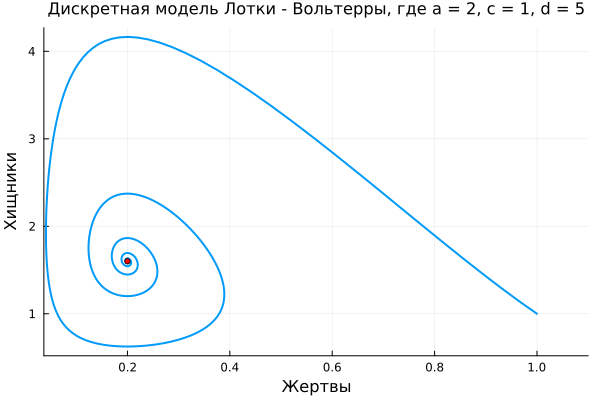

In [229]:
# Фазовый портрет
plot(sol_5, idxs=(1,2), lw=2, 
    title="Дискретная модель Лотки - Вольтерры, где a = $(p_5[1]), c = $(p_5[2]), d = $(p_5[3])",
    titlefontsize = 11,
    xaxis="Жертвы",yaxis="Хищники",legend=false)
# Отметим точку равновесия
scatter!((sol_5.u[end][1], sol_5.u[end][2]), color =:red, ms = 3)

Точка равновесия - $(0.2, 1.6)$ (по аналогии с непрерывной моделью, можно найти x координату особой точки - $x = ^{\gamma}/_{\delta} = ^c/_d = ^1/_5 = 0.2$)

[ Info: Saved animation to C:\Users\User\Documents\work\study\2023-2024\Statistical_Analysis_computer-practise\computer-practice\labs\lab06\report\report\tmp.gif


Plots.AnimatedGif("C:\\Users\\User\\Documents\\work\\study\\2023-2024\\Statistical_Analysis_computer-practise\\computer-practice\\labs\\lab06\\report\\report\\tmp.gif")
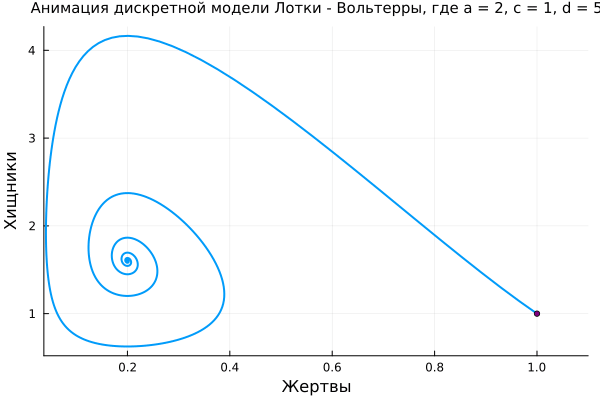

In [230]:
plot(sol_5, idxs=(1,2), lw=2, 
    title="Анимация дискретной модели Лотки - Вольтерры, где a = $(p_5[1]), c = $(p_5[2]), d = $(p_5[3])",
    titlefontsize = 10,
    xaxis="Жертвы",yaxis="Хищники",legend=false)
@gif for i ∈ 1:length(sol_5.u) 
    scatter!((sol_5.u[i][1], sol_5.u[i][2]),
        ms = 3,
        color =:purple,
        legend=false)
end

### 6. Реализовать на языке Julia модель отбора на основе конкурентных отношений:
$$
\begin{cases}
\dot{x} = \alpha x - \beta xy, \\
\dot{y} = \alpha y - \beta xy.
\end{cases}
$$
Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет.

In [246]:
# задаём описание модели:
Concurrent! = @ode_def ConcurrentRelations begin
dx = α*x - β*x*y
dy = α*y - β*x*y
end α β

(::ConcurrentRelations{var"###ParameterizedDiffEqFunction#9384", var"###ParameterizedTGradFunction#9385", var"###ParameterizedJacobianFunction#9386", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [247]:
# задаём начальное условие:
u0_6 = [10.0,7.0]
# задаём значения параметров (α, β):
p_6 = (1.5, 2.0)
# задаём интервал времени:
tspan_6 = (0.0,1.0);

In [248]:
# решение:
prob_6 = ODEProblem(Concurrent!, u0_6, tspan_6, p_6)
sol_6 = solve(prob_6, abstol=1e-12, reltol=1e-12)

retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 57-element Vector{Float64}:
 0.0
 0.007087361517120001
 0.011572834285818512
 0.017733526518712985
 0.02336363261357824
 0.029788666423539605
 0.03633429574423381
 0.04343652489310536
 0.05090694550599869
 0.058909545950189206
 0.06740779039919279
 0.07647890860091436
 0.08613301116009514
 ⋮
 0.7598988981443658
 0.7825419122104577
 0.8052686664838677
 0.8281174911343668
 0.8511291268829188
 0.8743473120647968
 0.8978191184513504
 0.9215960025536083
 0.9457340509501627
 0.9702953343602193
 0.9953488637651823
 1.0
u: 57-element Vector{Vector{Float64}}:
 [10.0, 7.0]
 [9.207740187748813, 6.175676929976707]
 [8.787995587686826, 5.735463191045128]
 [8.291872561088297, 5.211000854856821]
 [7.904442433814394, 4.7974421008136785]
 [7.524129833807606, 4.387040870065517]
 [7.191747472816011, 4.023705470140905]
 [6.882136856409725, 3.6801641967837546]
 [6.60321486

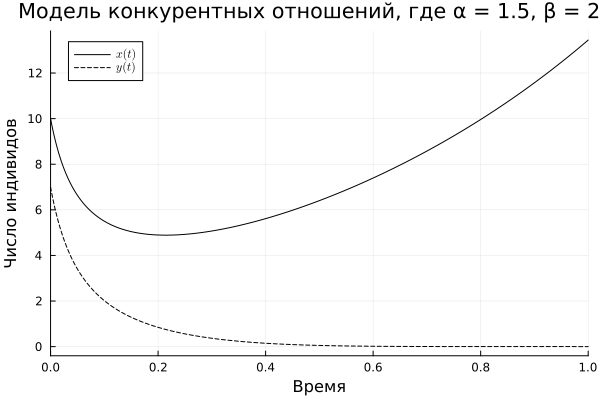

In [250]:
# строим график:
plot(sol_6, label = [L"$x(t)$" L"$y(t)$"], color="black", ls=[:solid :dash], title="Модель конкурентных отношений, где α = $(p_6[1]), β = $(p_6[2])",
    xaxis="Время",yaxis="Число индивидов")

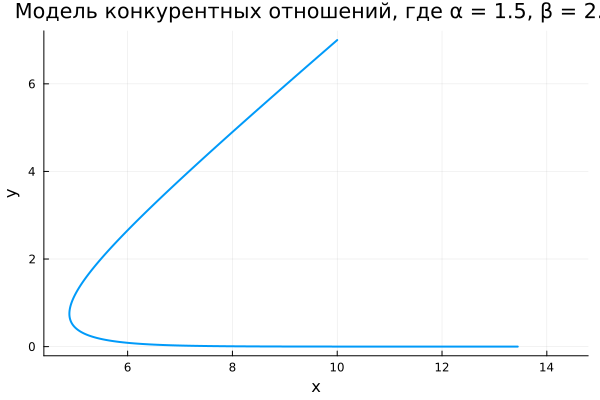

In [251]:
# Фазовый портрет
plot(sol_6, idxs=(1,2), lw=2, title="Модель конкурентных отношений, где α = $(p_6[1]), β = $(p_6[2])",
    xaxis="x",yaxis="y",legend=false)

[ Info: Saved animation to C:\Users\User\Documents\work\study\2023-2024\Statistical_Analysis_computer-practise\computer-practice\labs\lab06\report\report\tmp.gif


Plots.AnimatedGif("C:\\Users\\User\\Documents\\work\\study\\2023-2024\\Statistical_Analysis_computer-practise\\computer-practice\\labs\\lab06\\report\\report\\tmp.gif")
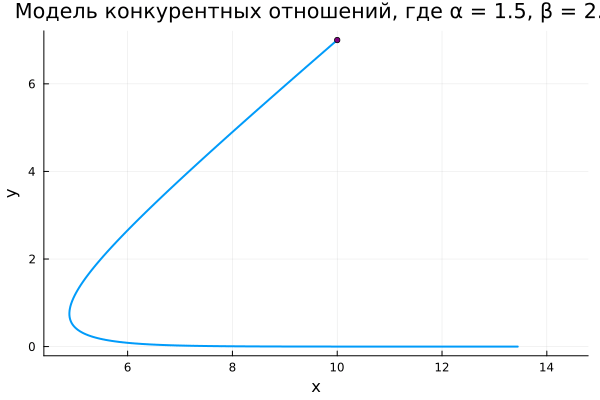

In [245]:
plot(sol_6, idxs=(1,2), lw=2, title="Модель конкурентных отношений, где α = $(p_6[1]), β = $(p_6[2])",
    xaxis="x",yaxis="y",legend=false)
@gif for i ∈ 1:length(sol_6.u) 
    scatter!((sol_6.u[i][1], sol_6.u[i][2]),
        ms = 3,
        color =:purple,
        legend=false)
end

### 7. Реализовать на языке Julia модель консервативного гармонического осциллятора
$$
\ddot{x} + \omega_0^2 x = 0, \quad x(t_0) = x_0, \quad \dot{x}(t_0) = y_0,
$$
где $\omega_0$ — циклическая частота. Начальные параметры подобрать самостоятельно,
выбор пояснить. Построить соответствующие графики (в том числе с анимацией)
и фазовый портрет

Данное дифференциальное уравнение второго порядка эквивалентно следующей системе, при следующей замене $\dot{x} = y$, $\dot{y} = \ddot{x}$
$$
\begin{cases}
\dot{x} = y, \\
\dot{y} = -\omega_0^2x
\end{cases}
$$

In [252]:
# задаём описание модели:
Conservative_Oscillator! = @ode_def Conservative_Harmonic_Oscillator begin
dx = y
dy = -ω_0^2*x
end ω_0

(::Conservative_Harmonic_Oscillator{var"###ParameterizedDiffEqFunction#10853", var"###ParameterizedTGradFunction#10854", var"###ParameterizedJacobianFunction#10855", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [253]:
# задаём начальное условие:
u0_7 = [2.0, 0.5]
# задаём значения параметров ω_0:
p_7 = 1
# задаём интервал времени:
tspan_7 = (0.0, 10.0);

In [254]:
# решение:
prob_7 = ODEProblem(Conservative_Oscillator!, u0_7, tspan_7, p_7)
sol_7 = solve(prob_7, abstol=1e-12, reltol=1e-12)

retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 60-element Vector{Float64}:
  0.0
  0.02798415350508774
  0.06941864775292841
  0.132033037461415
  0.23067452641931924
  0.3457273347872963
  0.4676449773677165
  0.6041461667165342
  0.7486141256796373
  0.9031173585671005
  1.0644100601365012
  1.231788046470059
  1.4028500315146972
  ⋮
  8.053776000357075
  8.23742653304688
  8.419999815861585
  8.606298863867748
  8.794047158401023
  8.983479226698481
  9.172928539224669
  9.3615897761321
  9.548578625364959
  9.73334538293183
  9.915131120565922
 10.0
u: 60-element Vector{Vector{Float64}}:
 [2.0, 0.5]
 [2.013207188851619, 0.44384323218469907]
 [2.0298644397398378, 0.3600699324848906]
 [2.0484174651939235, 0.2323486352197925]
 [2.0613419109689177, 0.029487727667799505]
 [2.051098975318877, -0.207347518542793]
 [2.0106574285400134, -0.4552545497376837]
 [1.9300046461766427, -0.7246254658349875]
 [1

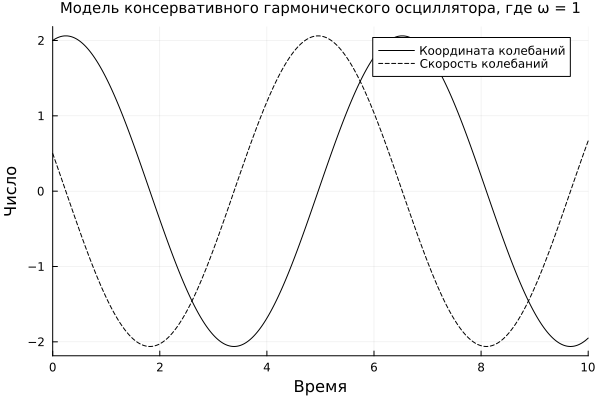

In [261]:
# строим график:
plot(sol_7, label = ["Координата колебаний" "Скорость колебаний"], color="black", ls=[:solid :dash], 
    title="Модель консервативного гармонического осциллятора, где ω = $(p_7)",
    titlefontsize = 10,
    xaxis="Время",yaxis="Число")

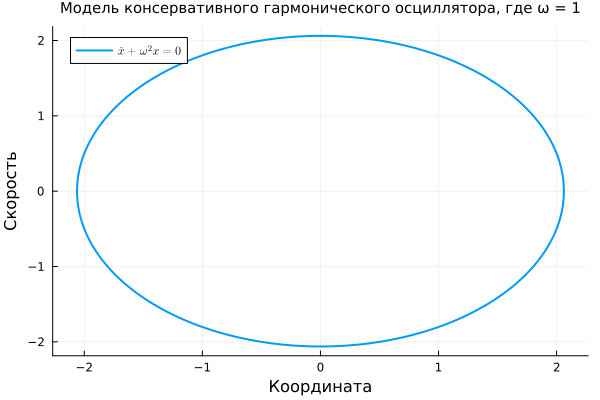

In [263]:
# Фазовый портрет
plot(sol_7, idxs=(1,2), lw=2, title="Модель консервативного гармонического осциллятора, где ω = $(p_7)",
    titlefontsize = 10,
    label = L"$\ddot{x} + ω^2x = 0$",
    xaxis="Координата",yaxis="Скорость",legend=true)

[ Info: Saved animation to C:\Users\User\Documents\work\study\2023-2024\Statistical_Analysis_computer-practise\computer-practice\labs\lab06\report\report\tmp.gif


Plots.AnimatedGif("C:\\Users\\User\\Documents\\work\\study\\2023-2024\\Statistical_Analysis_computer-practise\\computer-practice\\labs\\lab06\\report\\report\\tmp.gif")
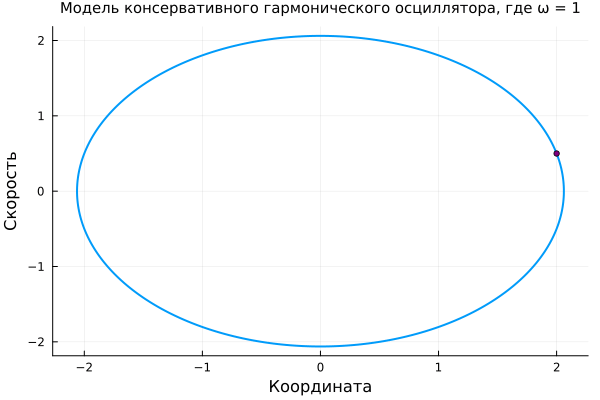

In [264]:
plot(sol_7, idxs=(1,2), lw=2, title="Модель консервативного гармонического осциллятора, где ω = $(p_7)",
    titlefontsize = 10,
    label = L"$\ddot{x} + ω^2x = 0$",
    xaxis="Координата",yaxis="Скорость",legend=true)
@gif for i ∈ 1:length(sol_7.u) 
    scatter!((sol_7.u[i][1], sol_7.u[i][2]),
        ms = 3,
        color =:purple,
        legend=false)
end

### 8. Реализовать на языке Julia модель свободных колебаний гармонического осциллятора
$$
\ddot{x} + 2\gamma \dot{x} + \omega^2_0 x = 0, \quad x(t_0) = x_0, \quad \dot{x}(t_0) = y_0,
$$
где $\omega_0$ — циклическая частота, $\gamma$ — параметр, характеризующий потери энергии.
Начальные параметры подобрать самостоятельно, выбор пояснить. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет

Данное дифференциальное уравнение второго порядка эквивалентно следующей системе, при следующей замене $\dot{x} = y$, $\dot{y} = \ddot{x}$
$$
\begin{cases}
\dot{x} = y, \\
\dot{y} = -2\gamma y  -\omega_0^2x
\end{cases}
$$

In [265]:
# задаём описание модели:
Free_Oscillator! = @ode_def Free_Harmonic_Oscillator begin
dx = y
dy = -2*γ*y -ω_0^2*x
end ω_0 γ

(::Free_Harmonic_Oscillator{var"###ParameterizedDiffEqFunction#12330", var"###ParameterizedTGradFunction#12331", var"###ParameterizedJacobianFunction#12332", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [273]:
# задаём начальное условие:
u0_8 = [2.0, 1.5]
# задаём значения параметров ω_0, γ:
p_8 = (1, 0.5)
# задаём интервал времени:
tspan_8 = (0.0, 15.0);

In [274]:
# решение:
prob_8 = ODEProblem(Free_Oscillator!, u0_8, tspan_8, p_8)
sol_8 = solve(prob_8, abstol=1e-12, reltol=1e-12)

retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 68-element Vector{Float64}:
  0.0
  0.02767167376971685
  0.06576384320662784
  0.12062747110742225
  0.20364975561058357
  0.31429517089155284
  0.43990512974012574
  0.575986723169731
  0.7209221050792035
  0.8741612074416413
  1.0341836155144524
  1.2005149785476612
  1.371928437205861
  ⋮
 11.619806913385595
 11.921418413883345
 12.226732925114058
 12.536753259109174
 12.852766544138023
 13.176271521189184
 13.508712511861063
 13.850202600860118
 14.197991411398606
 14.549467666504146
 14.904284087252652
 15.0
u: 68-element Vector{Vector{Float64}}:
 [2.0, 1.5]
 [2.040174597084184, 1.4039200752992564]
 [2.091173159796163, 1.2742198299933483]
 [2.15607455963035, 1.0927632044646372]
 [2.235809317865667, 0.8305657205350633]
 [2.3094472273044913, 0.505139897143591]
 [2.3514610967112377, 0.1699570561494495]
 [2.352232137722313, -0.15135286044440752]
 [2.

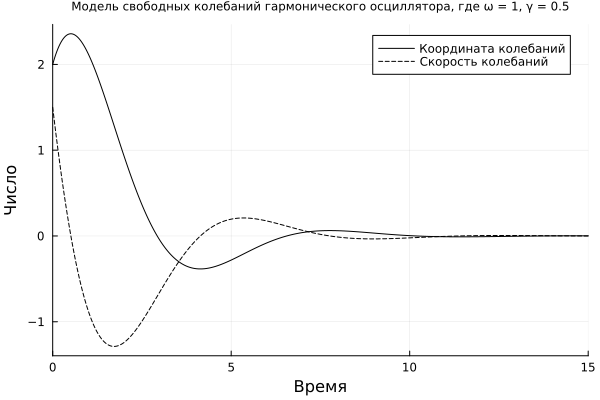

In [275]:
# строим график:
plot(sol_8, label = ["Координата колебаний" "Скорость колебаний"], color="black", ls=[:solid :dash], 
    title="Модель свободных колебаний гармонического осциллятора, где ω = $(p_8[1]), γ = $(p_8[2])",
    titlefontsize = 8,
    xaxis="Время",yaxis="Число")

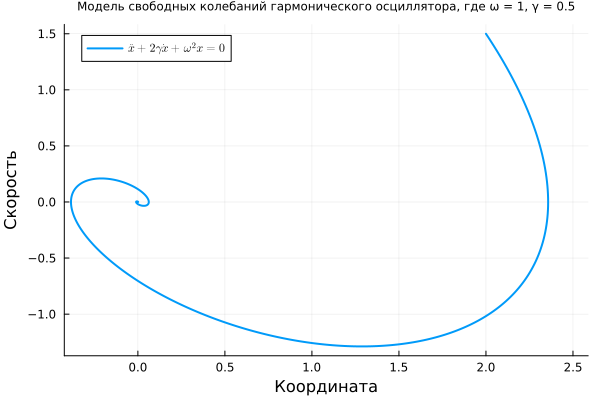

In [276]:
# Фазовый портрет
plot(sol_8, idxs=(1,2), lw=2, title="Модель свободных колебаний гармонического осциллятора, где ω = $(p_8[1]), γ = $(p_8[2])",
    titlefontsize = 8,
    label = L"$\ddot{x} + 2γ\dot{x} + ω^2x = 0$",
    xaxis="Координата",yaxis="Скорость",legend=true)

[ Info: Saved animation to C:\Users\User\Documents\work\study\2023-2024\Statistical_Analysis_computer-practise\computer-practice\labs\lab06\report\report\tmp.gif


Plots.AnimatedGif("C:\\Users\\User\\Documents\\work\\study\\2023-2024\\Statistical_Analysis_computer-practise\\computer-practice\\labs\\lab06\\report\\report\\tmp.gif")
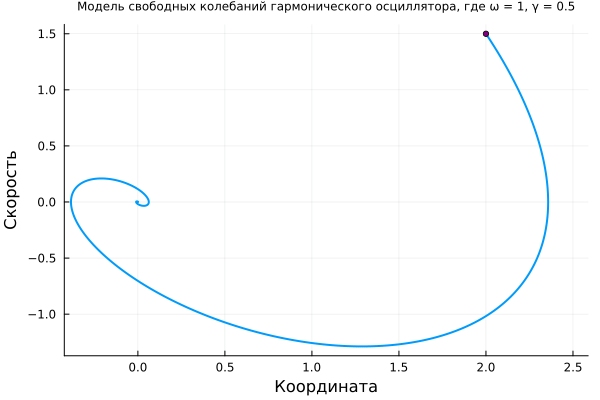

In [277]:
plot(sol_8, idxs=(1,2), lw=2, title="Модель свободных колебаний гармонического осциллятора, где ω = $(p_8[1]), γ = $(p_8[2])",
    titlefontsize = 8,
    label = L"$\ddot{x} + 2γ\dot{x} + ω^2x = 0$",
    xaxis="Координата",yaxis="Скорость",legend=true)
@gif for i ∈ 1:length(sol_8.u) 
    scatter!((sol_8.u[i][1], sol_8.u[i][2]),
        ms = 3,
        color =:purple,
        legend=false)
end